In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [4]:
def make_df(csvpath='ppchris.csv'):
    return pd.read_csv(os.path.join('.', csvpath))


In [199]:
gptdf = make_df('gpt3_results_full_clean_2.csv')
gptdf['GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()].fillna(value='', inplace=True)
ppdf = make_df('ppfull.csv')
ppdf['HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()].fillna(value='', inplace=True)

ppdf.drop('HDans HRans GenR GenD'.split(), axis=1, inplace=True)
gptdf = gptdf.join(ppdf.set_index('ID'), on='ID').drop('\
        HD1 HD2 HD3 HD4 \
        HR1 HR2 HR3 HR4 \
        '.split(), axis=1)

/Users/chrisrytting/env/lib/python3.9/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
glove_dic = loadGloveModel("/Users/chrisrytting/Downloads/glove.6B.300d.txt")

284it [00:00, 2837.87it/s]

Loading Glove Model


400000it [00:51, 7807.02it/s]

400000  words loaded!


In [210]:
def loadGloveModel(File = "/home/crytting/Downloads/glove.6B.300d.txt"):
    """
    load glove embeddings in to a dictionary
    """
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in tqdm(f):
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

def glove_word(word, glove_dic):
    """
    Return the glove embedding of a word, unless it's not in the dic, in which
    case return zeros
    """
    try:
        embed = glove_dic[word]
        return embed
    except:
        return np.zeros(300)
    

def apply_glove_model(phrase, glove_dic):
    """
    Get glove embedding from word or """
    try:
        toks = phrase.strip().split()
    except:
        print(phrase.dtype)
        sys.exit()
        
    if len(toks) == 0:
        return glove_word("", glove_dic)
    
    if len(toks) == 1:
        return glove_word(toks[0], glove_dic)
    else:
        embeds = []
        for tok in toks:
            embeds.append(glove_word(tok, glove_dic)) 
    
        mean = np.mean(np.stack(embeds), axis=0)
        if isinstance(mean, float):
            print(mean)
        return mean


def generate_glove_tsne_cols(df, col, glove_dic = None):
    if isinstance(glove_dic, str):
        glove_dic = loadGloveModel(glove_dic)
    
#     Might be pointless these two lines lol
#     nonstrmask = df[col][~df.applymap(type).eq(str)[col]].index
#     df[col][nonstrmask] = ''
    values = df[col].str.lower().values
    print((values[155]))
    result = [apply_glove_model(v, glove_dic) for v in values]
    #     result = df[col].str.lower().apply(apply_glove_model, args=(glove_dic,))
    print( set([type(value) for value in result]))
    print(set([len(r) for r in result]))

    
    df[col + "glove"] = result

    model = TSNE(n_components=2, random_state=0)
    result = model.fit_transform(df[col+'glove'])
    df[col + "tsne_x"] = result[:,0]
    df[col + "tsne_y"] = result[:,1]

def process_gptdf(df, glove_dic=None):
    for col in 'GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split(): 
        generate_glove_tsne_cols(df, col, glove_dic)
        
def process_ppdf(df, glove_dic=None):
    for col in 'HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split():
        generate_glove_tsne_cols(df, col, glove_dic)

In [211]:
process_gptdf(gptdf, glove_dic=glove_dic)

nan


AttributeError: 'float' object has no attribute 'dtype'

In [20]:
process_ppdf(ppdf, glove_dic=glove_dic)

<ipython-input-18-482f0f6635c8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][nonstrmask] = ''
/Users/chrisrytting/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [21]:
ppdf

,ID,Inc,Hisp,Ideo,Age,HD1,HD2,HD3,HD4,HR1,...,dkR,dkD,HD1glove,HD2glove,HD3glove,HD4glove,HR1glove,HR2glove,HR3glove,HR4glove
0,R_dbTpgNCUaQtIifr,$100K to $150K,Not Hispanic,Slightly conservative,40.0,idiots,,,,conservative,...,1,1,"[-0.15697, -0.38941, 0.46308, 0.67359, 0.3441,...",NaN,NaN,NaN,"[-0.26112, -0.18659, 0.36428, 0.22879, 0.03220...",NaN,NaN,NaN
1,R_51QVYKmeIc9iLpH,$100K to $150K,Not Hispanic,Slightly conservative,50.0,liberal,,,,conservative,...,1,1,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...",NaN,NaN,NaN,"[-0.26112, -0.18659, 0.36428, 0.22879, 0.03220...",NaN,NaN,NaN
2,R_9Fy2uWRvtBBSouh,Less than $15K,Not Hispanic,Liberal,54.0,liberal,loyal,ideological,individualistic,narrow minded,...,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.27978, -0.11336, 0.81664, -0.4006, 0.60497...","[0.4073, -0.47221, -0.3073, -0.28354, 0.15578,...","[-0.15283, 0.19277, -0.034916, -0.080388, 0.13...","[-0.207924, -0.14371, -0.166682, -0.07360935, ...","[0.07413, -0.36728, 0.18244, 0.15885, -0.19874...","[-0.16268, -0.68915, -0.1479, 0.23345, -0.1393...","[-0.1013, -0.0043986, 0.97644, 0.04537, 0.0831..."
3,R_b444PyqTixypGPX,$75K to $100K,Not Hispanic,Slightly conservative,58.0,liberal,freethinkers,young,homemakers,conservatives,...,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[0.48556, 0.35081, 0.18084, 0.19435, -0.15075,...","[-0.10347, 0.15125, 0.36286, -0.078769, 0.0613...","[-0.045976, 0.011439, 0.92533, -0.1086, 0.1795...","[-0.11928, -0.25395, 0.32524, 0.21548, 0.03222...","[0.45414, -0.33188, -0.096686, 0.085561, 0.148...","[0.074647, 0.31647, 0.15191, 0.31129, 0.32036,...","[0.11273, -0.17851, 0.075537, 0.66185, 0.43908..."
4,R_55RM09n4GI3CF7v,$100K to $150K,Not Hispanic,Conservative,57.0,liberal,minority,women,poor,educated,...,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[0.13179, -0.061957, 0.26494, 0.15096, -0.1177...","[-0.43895, 0.47642, 0.18844, 0.12934, -0.07087...","[0.2276, -0.10096, 0.15344, -0.11363, 0.038617...","[-0.31417, 0.4282, 0.54378, 0.13272, 0.22949, ...","[-0.32418, 0.4799, -0.17283, -0.2947, -0.08923...","[-0.065281, 0.13371, 0.30315, -0.027717, 0.537...","[-0.089656, 0.5601, 0.42423, 0.40604, -0.03008..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,R_12Kn3gsoNJ9ZXai,$200K to $250K,Not Hispanic,Moderate/Haven't thought about it,13.0,liberal,tolerant,generous,idealistic,conservative,...,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.26004, -0.71775, 0.24613, -0.60966, 0.1149...","[-0.17539, -0.63199, 0.24836, -0.33787, 0.6565...","[-0.09346, -0.287, -0.083301, -0.17413, 0.3886...","[-0.26112, -0.18659, 0.36428, 0.22879, 0.03220...","[0.4419, 0.11841, 0.42251, -0.27944, -0.19053,...","[0.13199, 0.2082, 0.47362, -0.2915, -0.06591, ...","[0.090182, -0.19068, 0.23113, -0.30332, 0.1886..."
2109,R_tS2E3e7N1G31Mop,$250K to $500K,Not Hispanic,Slightly liberal,14.0,diverse,urban,liberal,atheistic,white,...,0,0,"[-0.24817, -0.089356, 0.25045, -0.25262, 0.231...","[0.086901, -0.26049, 0.46284, 0.16332, 0.40226...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[0.13885, -0.58312, 0.033329, -0.10566, -0.800...","[-0.21079, -0.07371, -0.22369, -0.52861, -0.47...","[-0.37858, -0.066782, -0.37432, -0.34205, 0.50...","[-0.20551, -0.32364, -0.24129, 0.32891, 0.4092...","[-0.17637, -0.059269, 0.16021, 0.19046, 0.5791..."
2110,R_2737ySI7lv6vw23,$250K to $500K,Not Hispanic,Slightly liberal,15.0,black,jewish,latte,liberal,old,...,0,0,"[-0.086825, 0.036227, 0.46572, -0.37567, -0.38...","[0.02586, -0.42939, -0.046706, 0.37439, -0.076...","[-0.28736, 0.080298, 0.066654, 0.25736, -0.181...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.37858, -0.066782, -0.37432, -0.34205, 0.50...","[-0.21079, -0.07371, -0.22369, -0.52861, -0.47...","[-0.12629, 0.13302, 0.52536, -0.16646, 0.57104...","[-0.20551, -0.32364, -0.24129, 0.32891, 0.4092..."
2111,R_2WVGmbNOoauGvla,Prefer not to answer,Not Hispanic,Moderate/Haven'

In [46]:
gptdf.columns

Index(['ID', 'GPTD_1', 'GPTD_2', 'GPTD_3', 'GPTD_4', 'GPTR_1', 'GPTR_2',
       'GPTR_3', 'GPTR_4', 'Inc', 'Hisp', 'Ideo', 'Age', 'PID7', 'PID3_p',
       'WHITE', 'Gender', 'dkR', 'dkD'],
      dtype='object')

In [47]:
ppdf.columns

Index(['ID', 'Inc', 'Hisp', 'Ideo', 'Age', 'GenD_1', 'GenD_2', 'GenD_3',
       'GenD_4', 'GenR_1', 'GenR_2', 'GenR_3', 'GenR_4', 'PID7', 'PID3_p',
       'WHITE', 'Gender', 'dkR', 'dkD'],
      dtype='object')

In [141]:
n= pd.DataFrame({"f": "Chris Parker Chris".split(), "l": "Rytting Rogers Sypherd".split()})

In [144]:
for col in 'f l'.split():
    n[col + "_"] = n[col] + "___"

In [157]:
n['f'].iloc[2] = 3

,f,l,f_,l_
0,Chris,Rytting,Chris___,Rytting___
1,Parker,Rogers,Parker___,Rogers___
2,3,Sypherd,Chris___,Sypherd___


In [196]:
n['f'][~n.applymap(type).eq(str)['f']].index

Int64Index([2], dtype='int64')

In [207]:
n[:2]

,f,l,f_,l_
0,Chris,Rytting,Chris___,Rytting___
1,Parker,Rogers,Parker___,Rogers___


In [288]:
tmp1 = []
for row in gptdf['GD1'].items():
    tmp1.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp2 = []
for row in gptdf['GD2'].items():
    tmp2.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp3 = []
for row in gptdf['GD3'].items():
    tmp3.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp4 = []
for row in gptdf['GD4'].items():
    tmp4.append( glove_word(str(row[1]).lower().strip(), glove_dic) )
      
    
    #    tmp.append( glove_word(row[1].lower().strip(), glove_dic) + glove_word(row[2].lower().strip(), glove_dic) + glove_word(row[3].lower().strip(), glove_dic) + glove_word(row[4].lower().strip(), glove_dic))
#np.atleast_2d(gptdf['GD1glove'])
ddata2 = np.atleast_2d(tmp1) + np.atleast_2d(tmp2) +np.atleast_2d(tmp3) +np.atleast_2d(tmp4)
print(ddata2.shape)

(2024, 300)


In [226]:
gptdf

,ID,GD1,GD2,GD3,GD4,GR1,GR2,GR3,GR4,Inc,...,Ideo,Age,PID7,PID3_p,WHITE,Gender,dkR,dkD,GD1glove,newcol
0,R_7OmqZMur4R7ThQ1,Liberal,open-minded,intellectual,caring,Conservative,White,Racist,Disgust,$50K to $75K,...,Moderate/Haven't thought about it,51.0,Ind,Independent (excludes leaners),White,Male,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
1,R_832fxdV4QEySr6B,Liberal,Progressive,Religious,Virtuous,"traditional, religious","white, wealthy",male,and politically conservative,$25K to $50K,...,Moderate/Haven't thought about it,38.0,Lean R,Republicans,White,Female,1,1,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
2,R_87mU7Bcjh4Iz1zf,Urban,Religious,Liberal,Children,"White, male","heterosexual, Christian",conservative,old,$100K to $150K,...,Moderate/Haven't thought about it,53.0,Weak D,Democrat,Non-white,Male,1,1,"[0.086901, -0.26049, 0.46284, 0.16332, 0.40226...","[0.086901, -0.26049, 0.46284, 0.16332, 0.40226..."
3,R_8B5ArZjGtWzEklv,Liberal,Atheistic,Pro-gay marriage,Pro-choice,White,male,Christian,heterosexual,$150K to $200K,...,Slightly conservative,67.0,Weak R,Republicans,White,Male,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
4,R_8BA7rctBCweoRHn,kind,compassionate,caring,giving and generous,Racist,Bigot,Homophobic,Gun lover,$50K to $75K,...,Liberal,27.0,Weak D,Democrat,White,Male,0,0,"[-0.11084, -0.018164, 0.059683, -0.23022, 0.17...","[-0.11084, -0.018164, 0.059683, -0.23022, 0.17..."
5,R_8H3DMVLRvZVemP3,Smart,educated,independent,UNBIASED,Religious,Conservative,Intelligent,Racist,$200K to $250K,...,Moderate/Haven't thought about it,62.0,Weak D,Democrat,White,Female,0,0,"[0.07848, -0.13317, -0.0079609, -0.62354, 0.47...","[0.07848, -0.13317, -0.0079609, -0.62354, 0.47..."
6,R_uq8oeVKbAPNvTlD,"Poor (you know, because I have no money in the...",Liberal (because I believe in social justice a...,Gay (because I'm a homosexual),Women (because I am a woman),Religious,Conservative,White,Male,$75K to $100K,...,Slightly conservative,12.0,Weak D,Democrat,White,Female,0,0,"[-0.08153818181818182, 0.06533718181818184, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,R_zYHIvcdvr2q9ZgB,Liberal (in a bad way),Out of touch,Supportive of big government,Supportive of big spending,Morality - Most Republicans believe that tradi...,Hard work - Republicans believe that the only ...,Community - Republicans believe that the commu...,NaN,$200K to $250K,...,Conservative,13.0,Strong R,Republicans,White,Male,0,0,"[-0.020978000000000007, -0.08238419999999999, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,R_2amlmGBwctqJbbY,Leftist - any person that believes that the go...,Liberal - any person that believes that the go...,Big Government - any person that thinks that t...,Intolerant - any person that believes the fede...,Racist,Ignorant,Homophobic,Anti-woman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,"[-0.09831282631578947, 0.16892994736842104, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,R_1N3nSfN95oRVCcZ,Open-minded,Progressive,Civil rights,Social justice,"White, male","Christian, straight",middle-class,conservative,$75K to $100K,...,Liberal,30.0,Strong D,Democrat,White,Male,0,0,"[-0.44176, -0.038171, -0.088209, -0.27945, 0.1...","[-0.44176, -0.038171, -0.088209, -0.27945, 0.1..."


In [228]:
ddata = np.atleast_2d(tmp)

In [229]:
ddata.shape


(2024, 300)

In [230]:
model = TSNE(n_components=2,random_state=0)
result =model.fit_transform(ddata)

In [231]:
result.shape

(2024, 2)

In [232]:
plt.scatter( result[:,0], result[:,1], s=0.1)

NameError: name 'plt' is not defined

In [233]:
%matplotlib inline

In [251]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

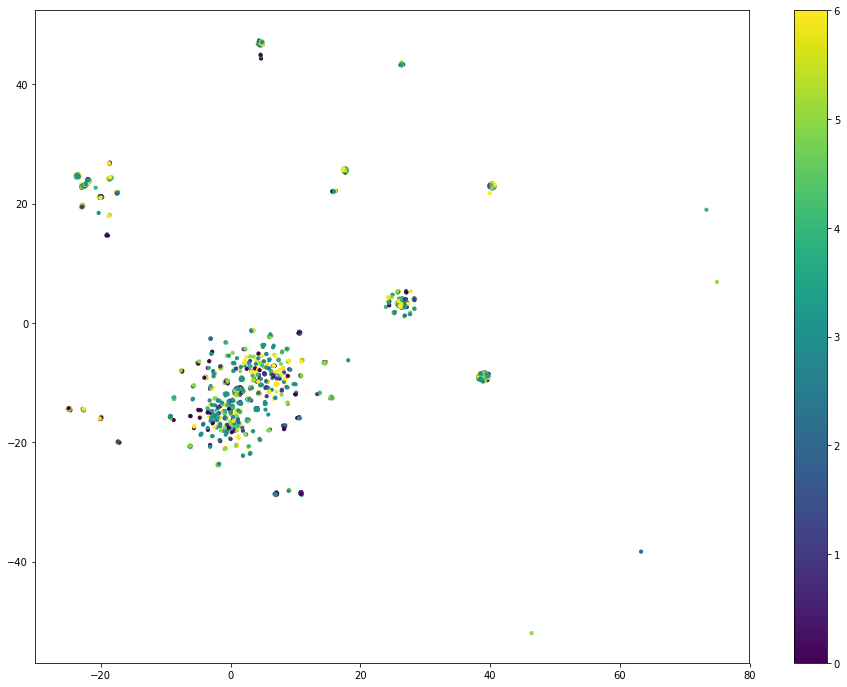

In [273]:
plt.scatter( result[:,0]+0.1*np.random.randn(2024), result[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

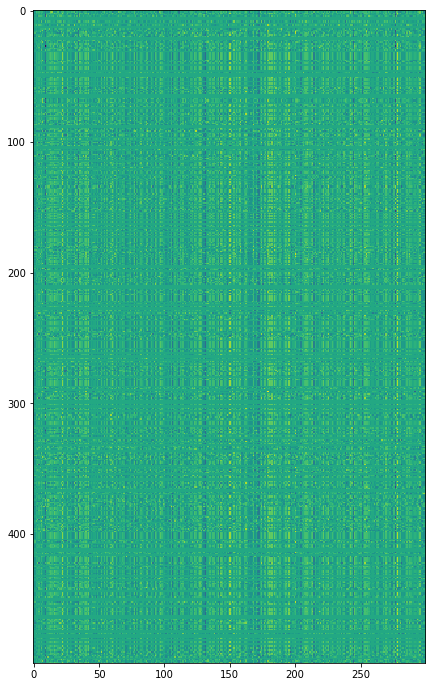

In [254]:
plt.imshow(ddata[1:500,:])

In [258]:
gptdf['PID7'].unique()


array(['Ind', 'Lean R', 'Weak D', 'Weak R', 'Strong R', nan, 'Strong D',
       'Lean D'], dtype=object)

In [264]:
mapper = {
    'Strong R':0,
    'Weak R':1,
    'Lean R':2,
    'Ind':3,
    'Lean D':4,
    'Weak D':5,
    'Strong D':6,
    np.nan:3,
}
pid_ints = []
for row in gptdf['PID7'].items():
    pid_ints.append(mapper[row[1]])


In [311]:
jitter = 0.1

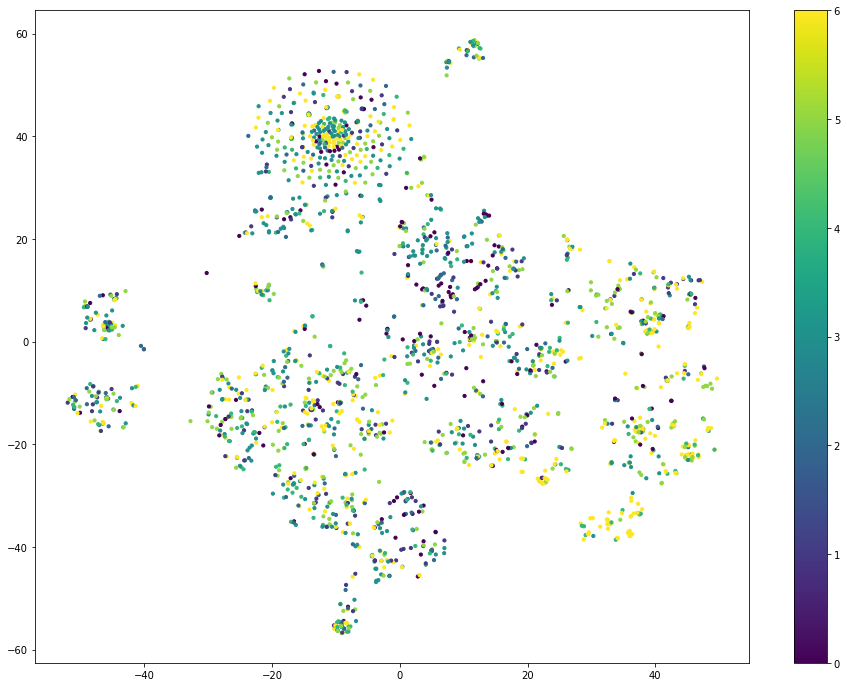

In [306]:
pcamodel = PCA(n_components=50,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

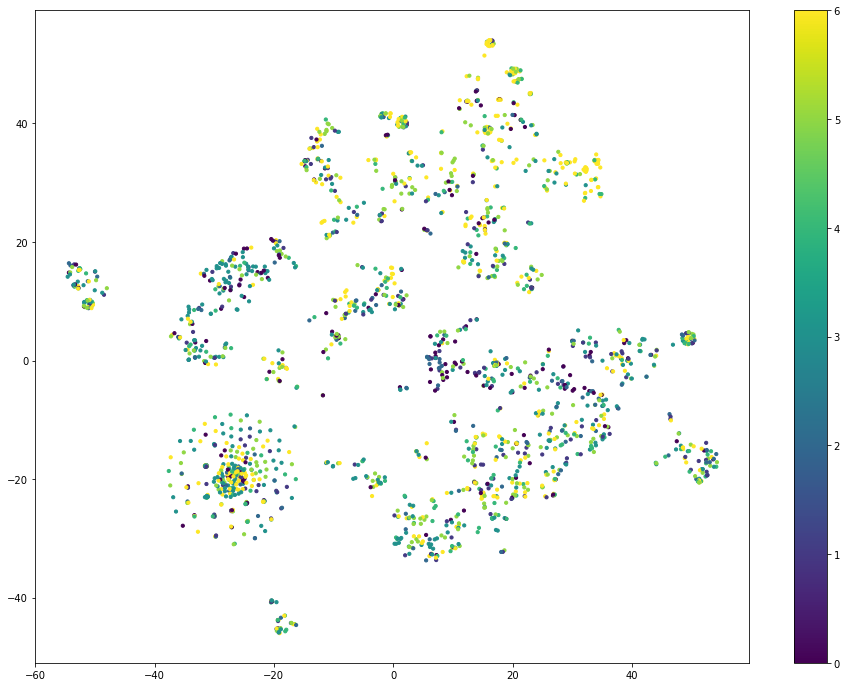

In [307]:
pcamodel = PCA(n_components=10,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

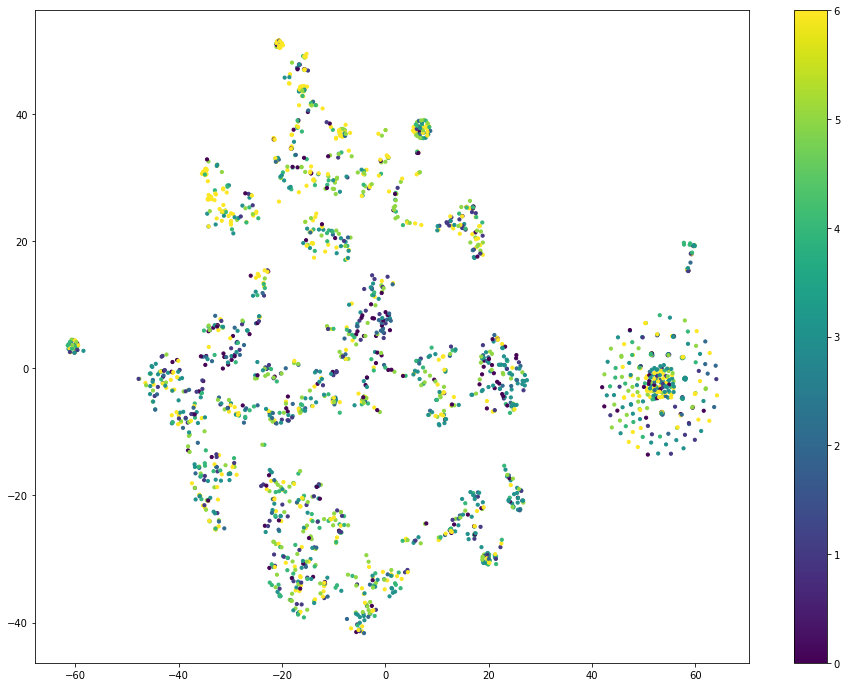

In [308]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

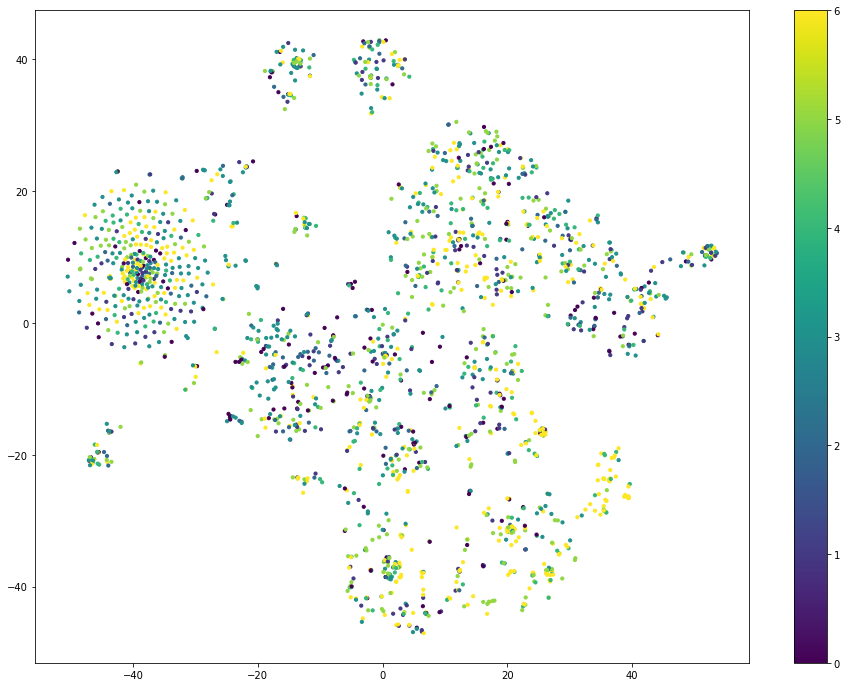

In [312]:
# pcamodel = PCA(n_components=10,random_state=0)
# pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(ddata2)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [309]:
keeper = result2

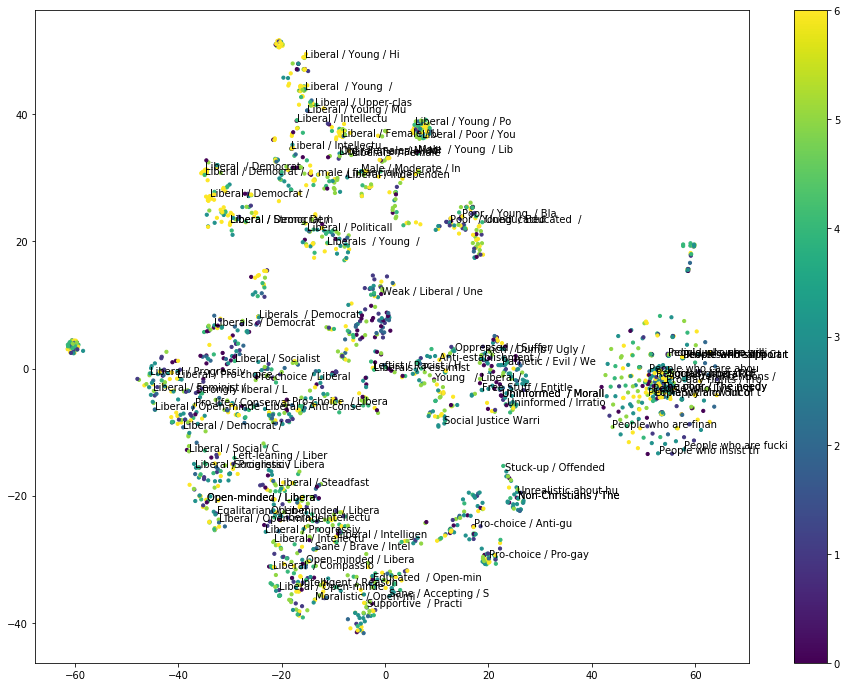

In [337]:
plt.scatter( keeper[:,0]+jitter*np.random.randn(2024), keeper[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

txt = gptdf['GD1'].astype(str) + ' / ' + gptdf['GD2'].astype(str) + ' / ' + gptdf['GD3'].astype(str) + ' / ' + gptdf['GD4'].astype(str)

inds = np.random.randint(0,high=2024,size=100)
for ind in inds:
    plt.text(keeper[ind,0],keeper[ind,1],txt[ind][0:20])

In [318]:
txt

0                                     Liberal open-minded
1                                   Liberal  Progressive 
2                                         Urban Religious
3                                       Liberal Atheistic
4                                      kind compassionate
5                                          Smart educated
6       Poor (you know, because I have no money in the...
7                     Liberal (in a bad way) Out of touch
8       Leftist - any person that believes that the go...
9                                 Open-minded Progressive
10                                Open-minded Progressive
11      I'm a Democrat because I don't want my childre...
12                                     Wealthy Uneducated
13                         Left-wing, liberal progressive
14                I'm OK, you're OK I'm OK, you're not OK
15      Non-Christians The poor, the working poor, the...
16                                          Poor Cautious
17            

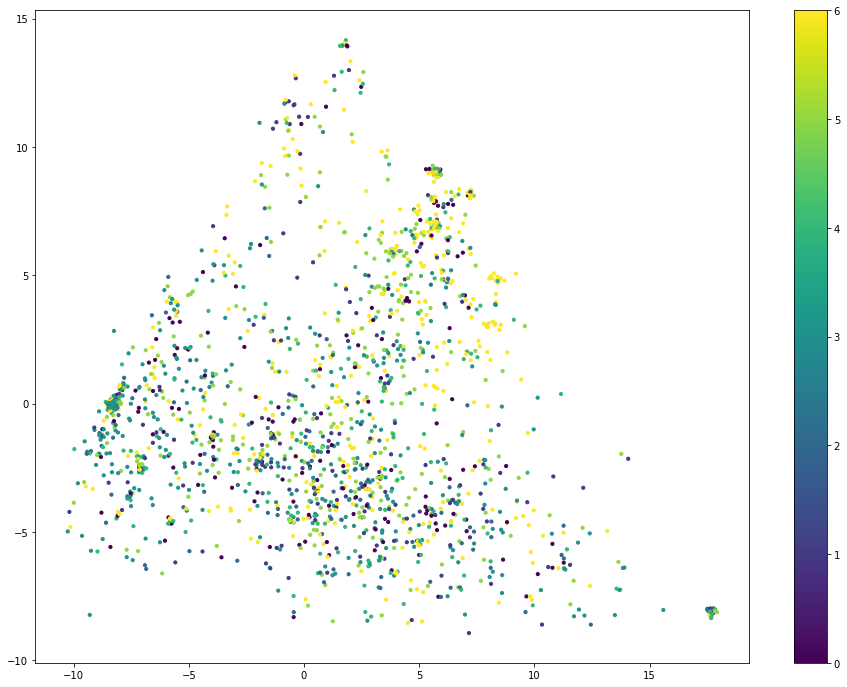

In [305]:
pcamodel = PCA(n_components=2,random_state=0)
result2 = pcamodel.fit_transform(ddata2)

plt.scatter( result2[:,0]+0.1*np.random.randn(2024), result2[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

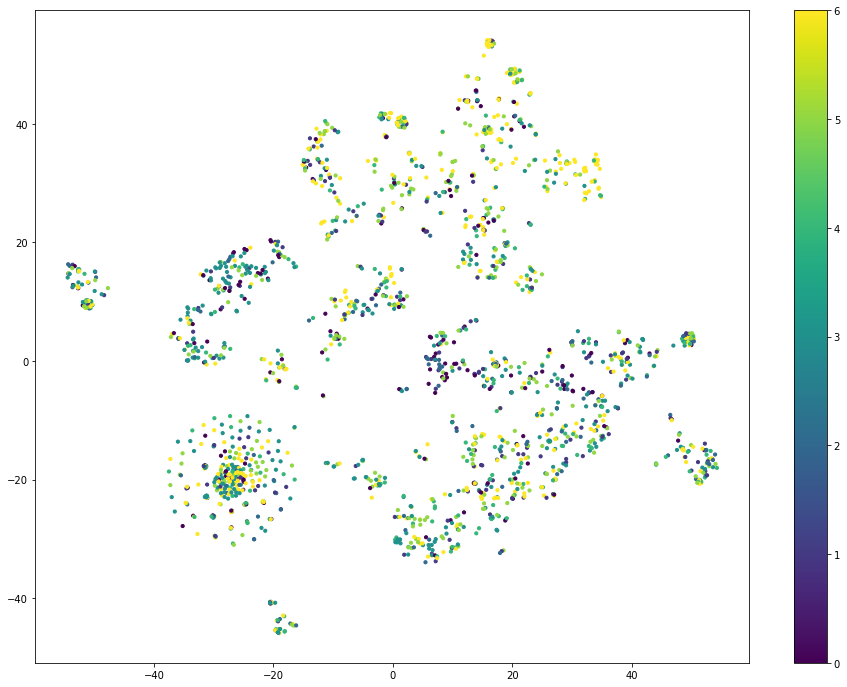